# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#

# Step 1: set up the parameters of the problem
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01

# TODO:
t_final = 20
n_steps = int(t_final / dt)
times = np.arange(0, t_final + dt, dt)
posx = np.zeros(len(times))
vel = np.zeros(len(times)) 
posx[0] = 1  
vel[0] = 0    
# Step 2: set up the time and solution arrays
dt = 0.01  
t_final = 20
n_steps = int(t_final / dt)
times = np.arange(0, t_final + dt, dt)
posx = np.zeros(len(times))
vel = np.zeros(len(times))
posx[0] = 1  # Initial position
vel[0] = 0   # Initial velocity
# Step 3: set up the initial conditions
initial_position = 1  # As given, x(0) = 1
initial_velocity = 0  # As given, v(0) = 0
posx[0] = initial_position
vel[0] = initial_velocity
print(f"Initial conditions set: Position = {posx[0]}, Velocity = {vel[0]}")

# Step 4: solve the difference equation using the Runge Kutta method
def derivatives(t, x, v, omega0):
    a = -omega0**2 * x  # Acceleration: a = d^2x/dt^2 = -ω0² * x
    return v, a
for n in range(len(times) - 1):
    # Current state
    x_n = posx[n]
    v_n = vel[n]
    t_n = times[n]
    
    # k1 coefficients
    k1_x, k1_v = derivatives(t_n, x_n, v_n, omega0)
    
    # Intermediate step
    x_intermediate = x_n + k1_x * dt
    v_intermediate = v_n + k1_v * dt
    
    # k2 coefficients
    k2_x, k2_v = derivatives(t_n + dt, x_intermediate, v_intermediate, omega0)
    
    # Update position and velocity using RK2 formula
    posx[n + 1] = x_n + 0.5 * dt * (k1_x + k2_x)
    vel[n + 1] = v_n + 0.5 * dt * (k1_v + k2_v)



Initial conditions set: Position = 1.0, Velocity = 0.0


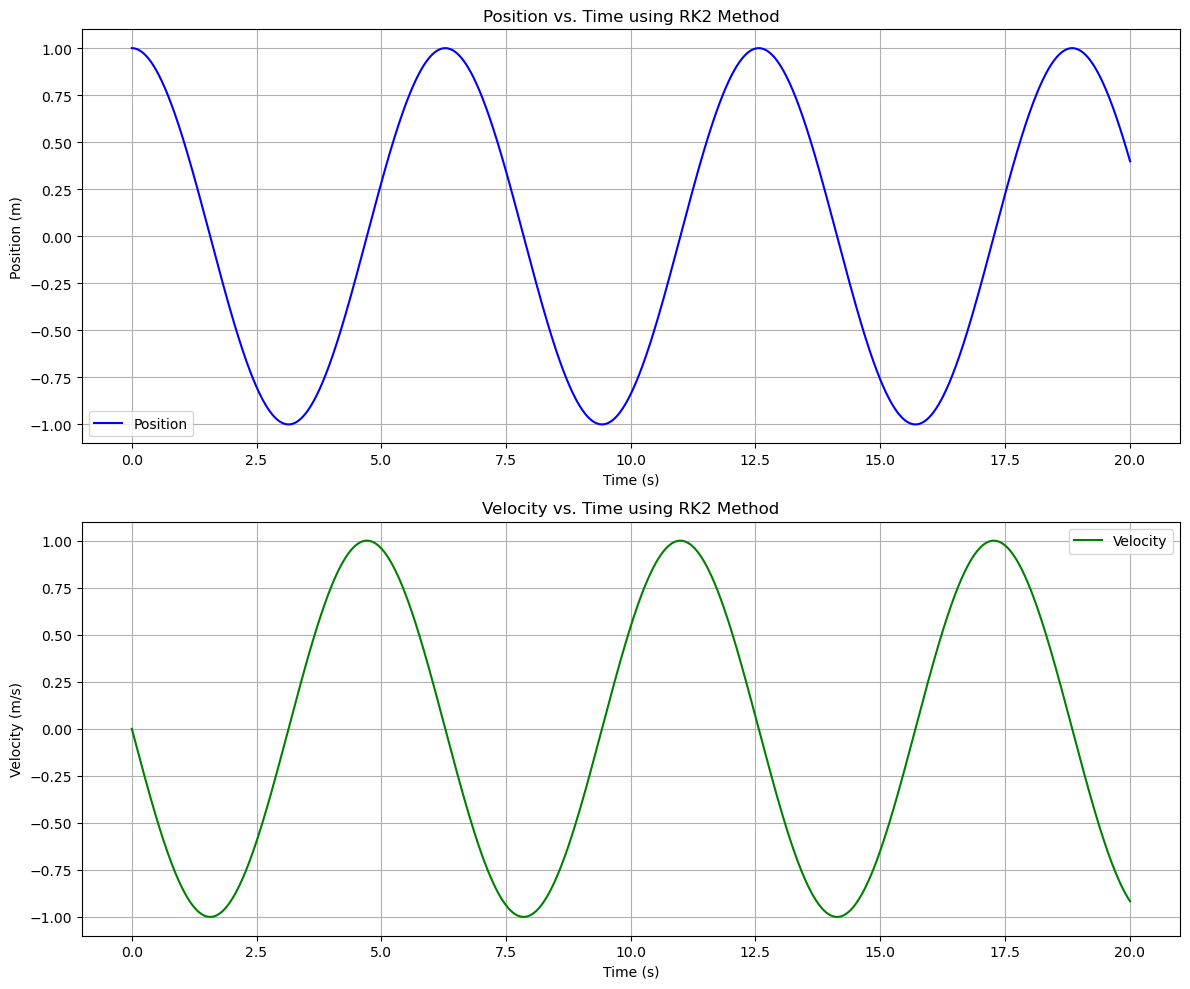

In [12]:
# Step 5: plot the solution

"""
plt.plot(times,posx)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()
"""
import matplotlib.pyplot as plt

# Step 5: Plot the solution

# Create a figure to plot two subplots
plt.figure(figsize=(12, 10))

# Plot position over time
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(times, posx, label='Position', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time using RK2 Method')
plt.grid(True)
plt.legend()

# Plot velocity over time
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(times, vel, label='Velocity', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time using RK2 Method')
plt.grid(True)
plt.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()



We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

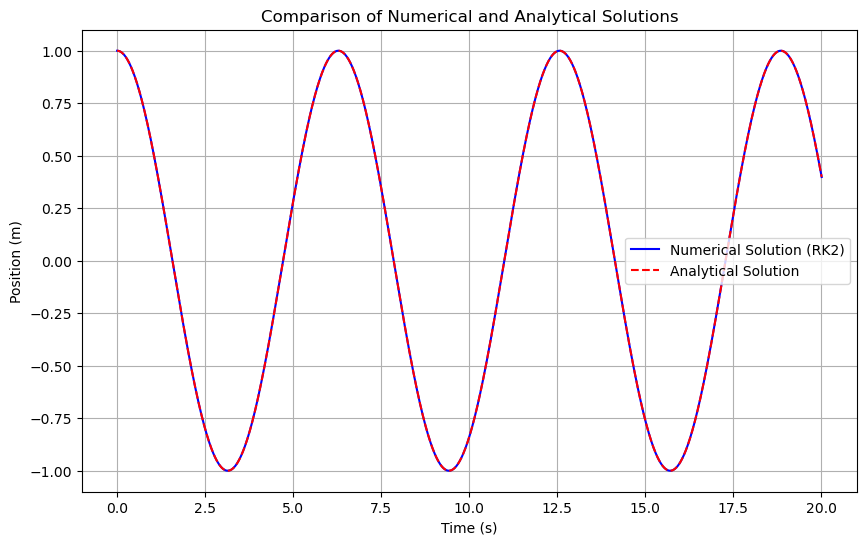

In [13]:
# Step 6: evaluate the analytical solution

# TODO:
x_analytical = A * np.cos(omega0 * times)
v_analytical = -A * omega0 * np.sin(omega0 * times)
plt.figure(figsize=(10, 6))
plt.plot(times, posx, label='Numerical Solution (RK2)', color='blue')
plt.plot(times, x_analytical, label='Analytical Solution', linestyle='--', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Comparison of Numerical and Analytical Solutions')
plt.grid(True)
plt.legend()
plt.show()




Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

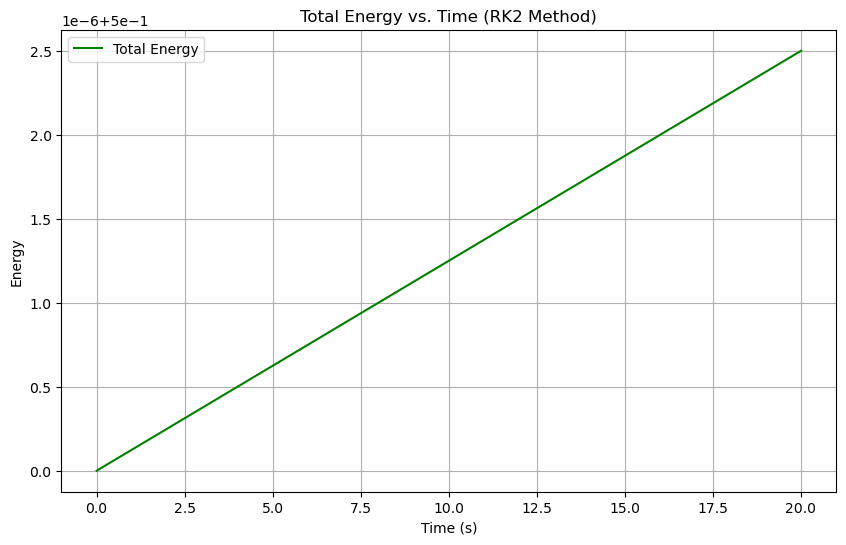

In [14]:
# Step 7: evaluate the energy (error) of the system

# TODO:
kinetic_energy = 0.5 * vel**2
potential_energy = 0.5 * posx**2
total_energy = kinetic_energy + potential_energy
plt.figure(figsize=(10, 6))
plt.plot(times, total_energy, label='Total Energy', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Total Energy vs. Time (RK2 Method)')
plt.grid(True)
plt.legend()
plt.show()




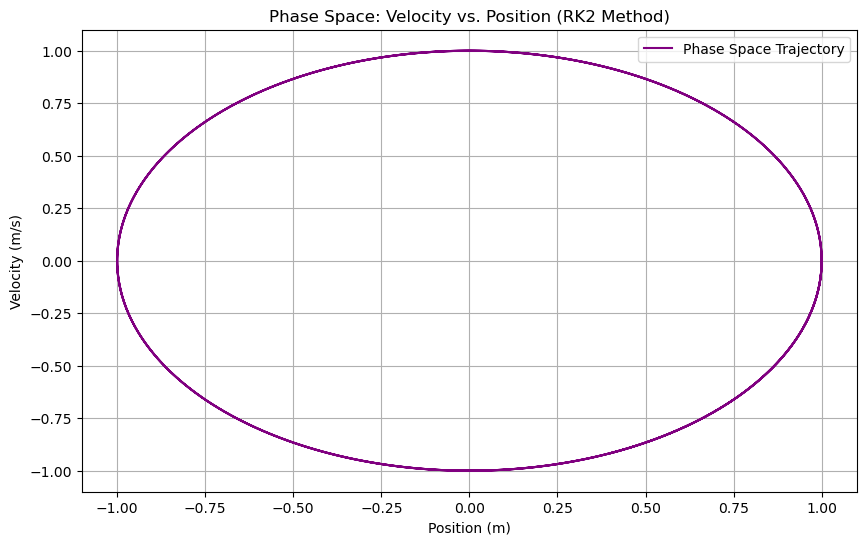

In [15]:
# Step 8: evaluate the phase space

# TODO:
plt.figure(figsize=(10, 6))
plt.plot(posx, vel, label='Phase Space Trajectory', color='purple')
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Phase Space: Velocity vs. Position (RK2 Method)')
plt.grid(True)
plt.legend()
plt.show()





## Exercise 2: Repeat with RK4


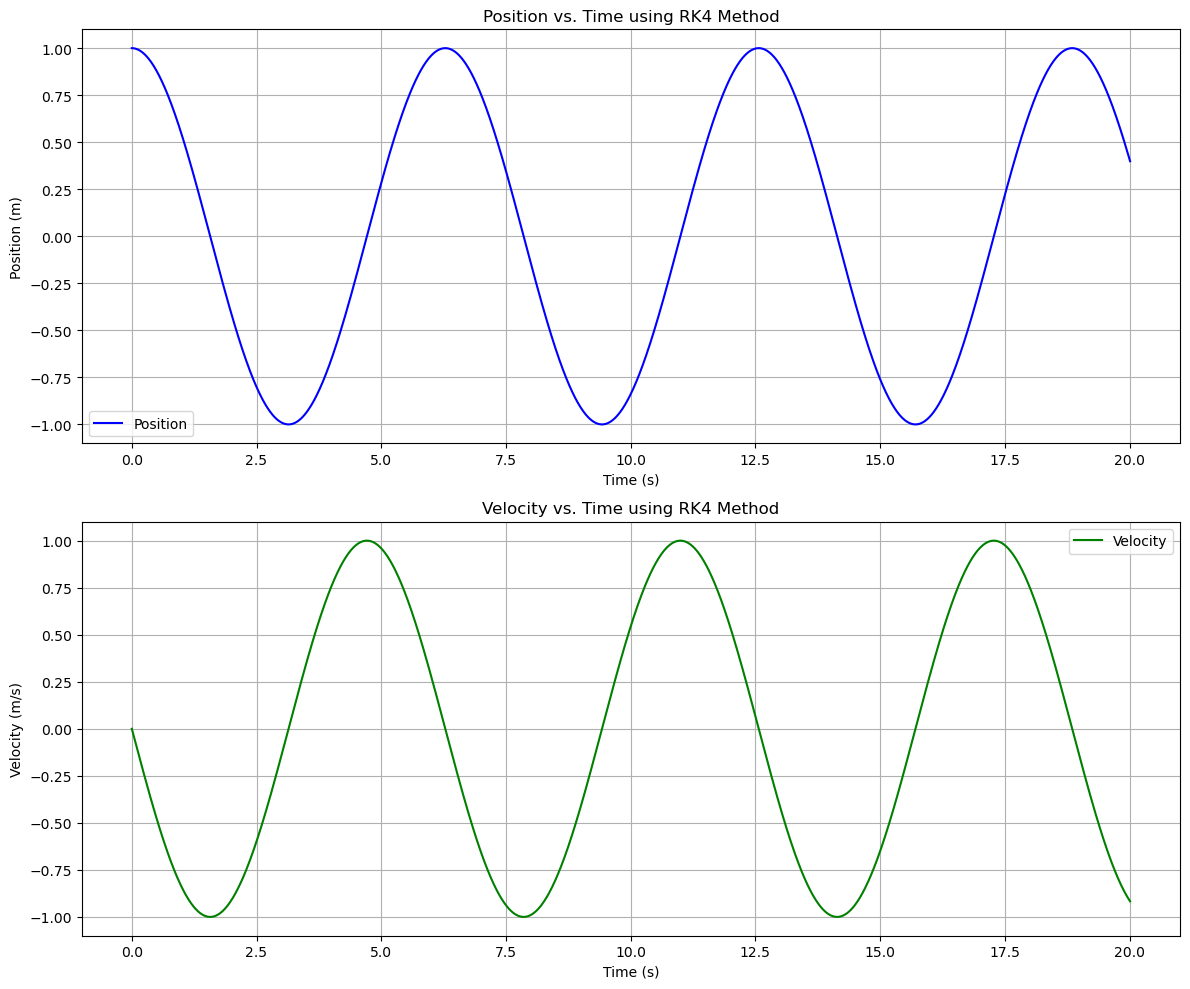

In [16]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK4 method
#

# TODO:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1           # Amplitude (not required for numerical computation, for reference)
k = 1           # Spring constant
m = 1           # Mass
omega0 = np.sqrt(k / m)  # Natural frequency
dt = 0.01       # Time step
t_final = 20    # Final time

# Time array
times = np.arange(0, t_final + dt, dt)
n_steps = len(times)

# Solution arrays
posx = np.zeros(n_steps)  # Position array
vel = np.zeros(n_steps)   # Velocity array

# Initial conditions
posx[0] = 1  # Initial position
vel[0] = 0   # Initial velocity

# Function to calculate derivatives
def derivatives(t, x, v, omega0):
    a = -omega0**2 * x  # Acceleration
    return v, a

# RK4 integration loop
for n in range(n_steps - 1):
    x_n = posx[n]
    v_n = vel[n]
    t_n = times[n]
    
    # k1 coefficients
    k1_x, k1_v = derivatives(t_n, x_n, v_n, omega0)
    
    # k2 coefficients
    k2_x, k2_v = derivatives(t_n + dt/2, x_n + k1_x * dt/2, v_n + k1_v * dt/2, omega0)
    
    # k3 coefficients
    k3_x, k3_v = derivatives(t_n + dt/2, x_n + k2_x * dt/2, v_n + k2_v * dt/2, omega0)
    
    # k4 coefficients
    k4_x, k4_v = derivatives(t_n + dt, x_n + k3_x * dt, v_n + k3_v * dt, omega0)
    
    # Update position and velocity using RK4 formula
    posx[n + 1] = x_n + (dt/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
    vel[n + 1] = v_n + (dt/6) * (k1_v + 2*k2_v + 2*k3_v + k4_v)

# Plotting the results
plt.figure(figsize=(12, 10))

# Plot position over time
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(times, posx, label='Position', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time using RK4 Method')
plt.grid(True)
plt.legend()

# Plot velocity over time
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(times, vel, label='Velocity', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time using RK4 Method')
plt.grid(True)
plt.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()






